In [1]:
!pip install DeepMIMO

In [2]:
import scipy.io
import numpy as np

# Load parameter file
params = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/O1_60.params.mat")
print("Params Loaded:", params.keys())

# Load Base Station and UE files
bs1_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS1_BS.mat")
ue1_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS1_UE_0-25821.mat")

bs2_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS2_BS.mat")
ue2_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS2_UE_0-25821.mat")

bs3_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS3_BS.mat")
ue3_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS3_UE_0-25821.mat")

# Print keys to understand structure
print("BS1 Keys:", bs1_data.keys())
print("UE1 Keys:", ue1_data.keys())


Params Loaded: dict_keys(['__header__', '__version__', '__globals__', 'version', 'carrier_freq', 'transmit_power', 'user_grids', 'num_BS', 'dual_polar_available', 'doppler_available'])
BS1 Keys: dict_keys(['__header__', '__version__', '__globals__', 'channels', 'rx_locs', 'tx_loc'])
UE1 Keys: dict_keys(['__header__', '__version__', '__globals__', 'channels', 'rx_locs', 'tx_loc'])


In [3]:
import scipy.io

# Load UE data
ue1_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS1_UE_0-25821.mat")

# Print available keys
print("Keys in UE file:", ue1_data.keys())


Keys in UE file: dict_keys(['__header__', '__version__', '__globals__', 'channels', 'rx_locs', 'tx_loc'])


In [4]:
import scipy.io
import pandas as pd

# Load UE file
ue_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS1_UE_0-25821.mat")

# Print data types and shapes
for key in ue_data.keys():
    if not key.startswith('__'):
        print(f"{key}: Type = {type(ue_data[key])}, Shape = {ue_data[key].shape}")


channels: Type = <class 'numpy.ndarray'>, Shape = (1, 25821)
rx_locs: Type = <class 'numpy.ndarray'>, Shape = (25821, 5)
tx_loc: Type = <class 'numpy.ndarray'>, Shape = (1, 3)


In [5]:
import scipy.io
import pandas as pd

# Load the .mat file
ue_data = scipy.io.loadmat("/content/drive/MyDrive/officefloor1/officefloor1/BS1_UE_0-25821.mat")

# Extract relevant data
ue_positions = ue_data['rx_locs']  # Shape: (25821, 5)
bs_position = ue_data['tx_loc'].flatten()  # Shape: (1, 3) → Flatten to (3,)
channel_data = ue_data['channels'].flatten()  # Shape: (25821,) → Flatten to 1D

# Convert to DataFrame
df_ue = pd.DataFrame(ue_positions, columns=['x', 'y', 'z', 'param1', 'param2'])  # Adjust column names
df_ue['channel'] = channel_data  # Append channel info to UE data

# Create a separate DataFrame for BS position
df_bs = pd.DataFrame([bs_position], columns=['BS_x', 'BS_y', 'BS_z'])

# Save to CSV
df_ue.to_csv("UE_positions.csv", index=False)
df_bs.to_csv("BS_position.csv", index=False)

print("Datasets saved as UE_positions.csv and BS_position.csv!")


Datasets saved as UE_positions.csv and BS_position.csv!


In [6]:
print(df_ue.head())  # First few rows of UE dataset
print(df_bs.head())  # BS position


         x        y    z     param1      param2  \
0 -14.9793 -14.4754  1.0  24.411400  108.292999   
1 -14.7793 -14.4754  1.0  24.331600  107.301003   
2 -14.5793 -14.4754  1.0  24.253201  113.653000   
3 -14.3793 -14.4754  1.0  24.176201  112.914001   
4 -14.1793 -14.4754  1.0  24.100599  111.681999   

                                             channel  
0  [[[[[ 1.52782e+02 -1.78104e+02 -1.14945e+02 -8...  
1  [[[[[ 9.85203e+01  5.91615e+01  1.66757e+02  1...  
2  [[[[[-7.72303e+01  1.77994e+02  8.48144e+01 -3...  
3  [[[[[-1.78009e+02 -4.02879e+01  1.53310e+02  1...  
4  [[[[[ 1.32075e+01 -3.51514e+01  1.74208e+02 -3...  
      BS_x     BS_y  BS_z
0 -5.15669  7.78295   3.0


In [63]:
import pandas as pd

# Load data
ue_df = pd.read_csv("/content/UE_positions.csv")

# Drop NaN values (just in case)
ue_df = ue_df.dropna(subset=["channel"])

# Print first 3 rows of 'channel' column
print("First few rows of 'channel' column:")
for i, row in enumerate(ue_df["channel"].head(3)):
    print(f"\nRow {i+1}: {row[:500]}")  # Print first 500 characters


First few rows of 'channel' column:

Row 1: [[(array([[ 1.52782e+02, -1.78104e+02, -1.14945e+02, -8.33337e+01,
          -1.08924e+01,  1.28496e+02,  1.07567e+02,  1.67057e+02,
          -4.44216e+01,  5.47900e+01, -1.69740e+02, -3.88866e+01,
          -9.51528e+01, -3.72774e+01, -3.34275e+01,  1.38780e+02,
          -8.23213e+01, -1.13270e+02,  1.68926e+02, -8.76242e+01,
           7.19719e+01, -1.23869e+02, -5.53765e+00, -1.38381e+02,
          -1.46729e+02,  1.00644e+02],
         [ 8.23206e-08,  8.46583e-08,  8.23292e-08,  8.46667e-08

Row 2: [[(array([[ 9.85203e+01,  5.91615e+01,  1.66757e+02,  1.62531e+02,
           1.30688e+02, -4.20592e+00,  1.12163e+02,  1.24806e+02,
           1.10872e+02,  6.70059e+01, -6.26417e+01, -4.43516e+01,
          -2.87240e+01, -3.55765e+01,  1.37746e+02, -7.26587e+01,
          -1.40301e+01, -1.04974e+02,  1.17403e+02, -1.15244e+02,
           6.56165e+01, -5.26322e+01,  1.47268e+02,  4.94533e+01,
          -1.46439e+02],
         [ 8.20757e-08,  

In [65]:
# Print the lengths of the first 10 extracted CSI rows
csi_lengths = [len(row) if isinstance(row, np.ndarray) else 0 for row in csi_data]
print("First 10 CSI row lengths:", csi_lengths[:10])
print("Min Length:", min(csi_lengths))
print("Max Length:", max(csi_lengths))


First 10 CSI row lengths: [417, 401, 401, 417, 417, 449, 417, 417, 417, 161]
Min Length: 3
Max Length: 801


In [67]:
from scipy.stats import mode

valid_lengths = [len(row) for row in csi_data if len(row) > 10]  # Ignore very small outliers

if len(valid_lengths) == 0:
    raise ValueError("No valid CSI vectors found. Check data extraction!")

print("Valid CSI Lengths:", valid_lengths[:10])  # Print first 10 lengths


Valid CSI Lengths: [417, 401, 401, 417, 417, 449, 417, 417, 417, 161]


In [68]:
target_length = mode(valid_lengths, keepdims=True).mode[0]  # Ensures correct indexing

print("Selected Fixed Length:", target_length)


Selected Fixed Length: 465


In [69]:
print("Total CSI Rows:", len(csi_data))
print("First 5 CSI Lengths:", [len(row) for row in csi_data[:5]])


Total CSI Rows: 25821
First 5 CSI Lengths: [417, 401, 401, 417, 417]


In [70]:
from scipy.stats import mode

# Extract valid CSI lengths (ignoring very short ones)
valid_lengths = [len(row) for row in csi_data if len(row) > 10]

if not valid_lengths:
    raise ValueError("No valid CSI vectors found. Check data extraction!")

# Use `mode().mode[0]` to get the most frequent CSI length
target_length = mode(valid_lengths, keepdims=True).mode[0]

print("Selected Fixed Length:", target_length)


Selected Fixed Length: 465


In [71]:
import numpy as np

def fix_csi_length(csi_row, target_length=465):
    """Pads or truncates CSI vectors to a fixed length."""
    if len(csi_row) > target_length:
        return csi_row[:target_length]  # Truncate
    elif len(csi_row) < target_length:
        return np.pad(csi_row, (0, target_length - len(csi_row)), mode='constant')  # Pad with zeros
    return csi_row

# Normalize and fix lengths
csi_data_fixed = np.array([fix_csi_length(row, target_length) for row in csi_data], dtype=np.float32)

print("Fixed CSI Data Shape:", csi_data_fixed.shape)
print("Sample Fixed CSI Row:", csi_data_fixed[0][:10])  # Print first 10 values of a sample row


Fixed CSI Data Shape: (25821, 465)
Sample Fixed CSI Row: [ 1.52782  2.      -1.78104  2.      -1.14945  2.      -8.33337  1.
 -1.08924  1.     ]


In [73]:
# Verify if all CSI vectors have the same length
vector_lengths = [len(row) for row in csi_data_fixed]  # Get lengths of all rows

# Check if all lengths are the same
if all(length == vector_lengths[0] for length in vector_lengths):
    print(f"✅ All CSI vectors have the same length: {vector_lengths[0]}")
else:
    print(f"❌ Inconsistent vector lengths found! Unique lengths: {set(vector_lengths)}")


✅ All CSI vectors have the same length: 465


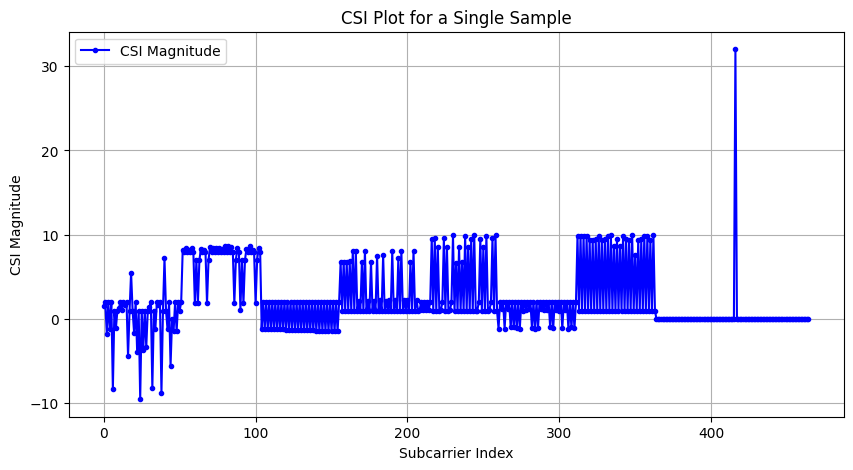

In [74]:
import matplotlib.pyplot as plt

# Select the first CSI vector (or any other index)
csi_sample = csi_data_fixed[0]

# Plot the CSI vector
plt.figure(figsize=(10, 5))
plt.plot(csi_sample, marker='o', linestyle='-', color='b', markersize=3, label="CSI Magnitude")

# Labels and title
plt.xlabel("Subcarrier Index")
plt.ylabel("CSI Magnitude")
plt.title("CSI Plot for a Single Sample")
plt.legend()
plt.grid()

# Show the plot
plt.show()


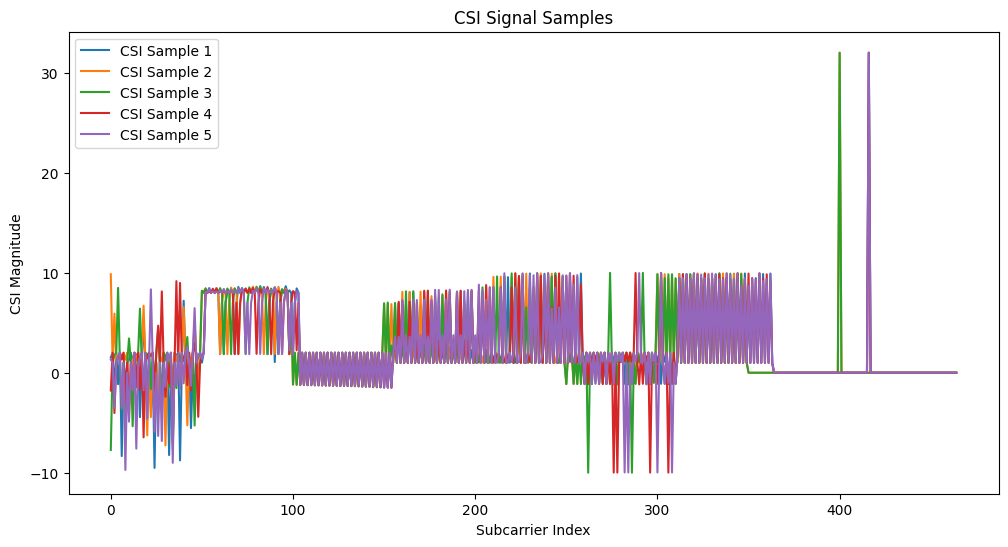

In [72]:
import matplotlib.pyplot as plt

# Plot first 5 CSI signals
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(csi_data_fixed[i], label=f"CSI Sample {i+1}")

plt.xlabel("Subcarrier Index")
plt.ylabel("CSI Magnitude")
plt.title("CSI Signal Samples")
plt.legend()
plt.show()


In [75]:
unique_lengths = set(len(row) for row in csi_data_fixed)
print("Unique CSI Vector Lengths:", unique_lengths)


Unique CSI Vector Lengths: {465}


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
csi_data_fixed = scaler.fit_transform(csi_data_fixed)


In [77]:
import numpy as np
csi_mean = np.mean(csi_data_fixed, axis=1)
csi_variance = np.var(csi_data_fixed, axis=1)
print("Mean of first 5 CSI vectors:", csi_mean[:5])
print("Variance of first 5 CSI vectors:", csi_variance[:5])


Mean of first 5 CSI vectors: [0.5035974  0.49506658 0.4889202  0.50085986 0.4947356 ]
Variance of first 5 CSI vectors: [0.10385293 0.10675609 0.10618594 0.1032927  0.10517219]


In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(csi_data_fixed)
print("Cluster Labels:", labels[:10])


Cluster Labels: [2 2 2 2 2 2 2 2 2 1]


In [79]:
import numpy as np

# Identify indices for each cluster
cluster_2_indices = labels == 2
cluster_1_indices = labels == 1

# Compute mean and variance for each cluster
mean_cluster_2 = np.mean(csi_data_fixed[cluster_2_indices], axis=0)
mean_cluster_1 = np.mean(csi_data_fixed[cluster_1_indices], axis=0)

var_cluster_2 = np.var(csi_data_fixed[cluster_2_indices], axis=0)
var_cluster_1 = np.var(csi_data_fixed[cluster_1_indices], axis=0)

print("Mean of Cluster 2 (first 5 values):", mean_cluster_2[:5])
print("Variance of Cluster 2 (first 5 values):", var_cluster_2[:5])

print("Mean of Cluster 1 (first 5 values):", mean_cluster_1[:5])
print("Variance of Cluster 1 (first 5 values):", var_cluster_1[:5])


Mean of Cluster 2 (first 5 values): [0.4976253  0.46778542 0.23878987 0.17455404 0.50143486]
Variance of Cluster 2 (first 5 values): [0.05256706 0.03744084 0.01198403 0.00539452 0.05336137]
Mean of Cluster 1 (first 5 values): [0.5189521  0.44162145 0.2757901  0.16592218 0.50055367]
Variance of Cluster 1 (first 5 values): [0.0580114  0.04645295 0.03912184 0.00666153 0.05142875]


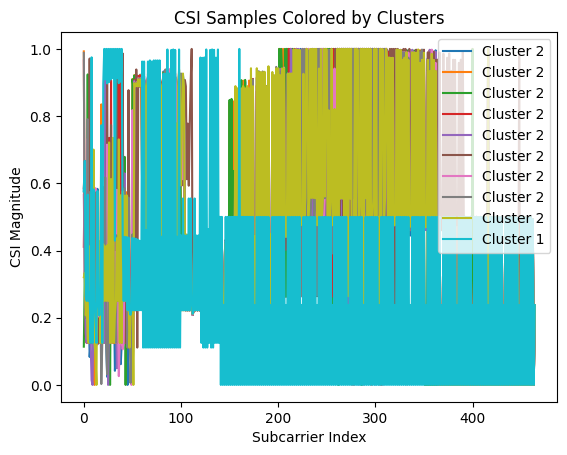

In [81]:
import matplotlib.pyplot as plt

for i in range(10):  # Plot first 10 CSI samples
    plt.plot(csi_data_fixed[i], label=f"Cluster {labels[i]}")

plt.xlabel("Subcarrier Index")
plt.ylabel("CSI Magnitude")
plt.title("CSI Samples Colored by Clusters")
plt.legend()
plt.show()


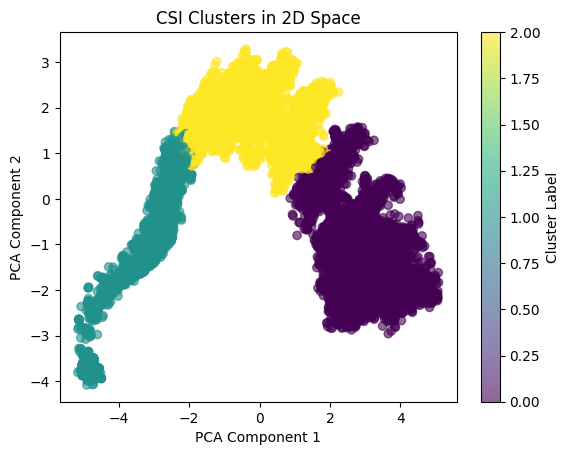

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
csi_pca = pca.fit_transform(csi_data_fixed)

plt.scatter(csi_pca[:, 0], csi_pca[:, 1], c=labels, cmap="viridis", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("CSI Clusters in 2D Space")
plt.colorbar(label="Cluster Label")
plt.show()


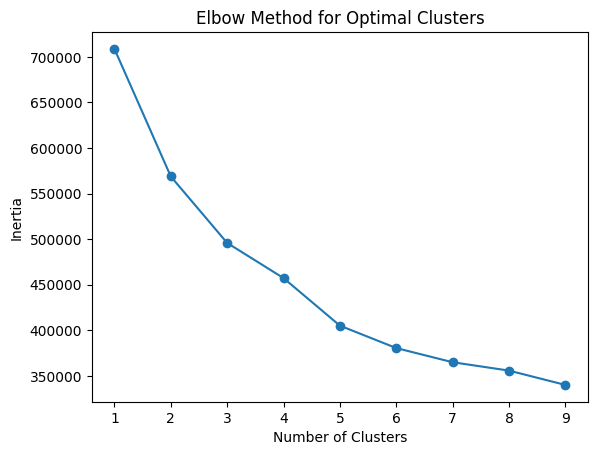

In [83]:
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(csi_data_fixed)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


Epoch 0 | Loss D: 1.3732, Loss G: 0.7007
Epoch 500 | Loss D: 1.4600, Loss G: 0.6771
Epoch 1000 | Loss D: 1.3133, Loss G: 0.7523
Epoch 1500 | Loss D: 1.2196, Loss G: 0.5573
Epoch 2000 | Loss D: 1.3888, Loss G: 0.6967
Epoch 2500 | Loss D: 1.5524, Loss G: 0.6477
Epoch 3000 | Loss D: 1.2324, Loss G: 0.6930
Epoch 3500 | Loss D: 1.9696, Loss G: 0.6179
Epoch 4000 | Loss D: 1.4089, Loss G: 0.6127
Epoch 4500 | Loss D: 1.4694, Loss G: 1.0188


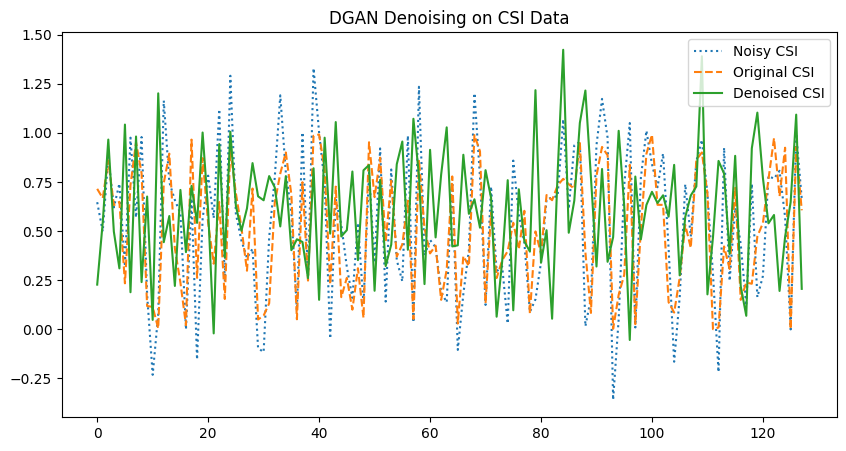

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Load or simulate CSI data
def generate_noisy_data(data, noise_factor=0.2):
    noise = noise_factor * np.random.randn(*data.shape)
    return data + noise  # Noisy CSI data

# Example CSI data (replace with real CSI data)
real_data = np.random.rand(1000, 128)  # 1000 CSI vectors with 128 subcarriers
noisy_data = generate_noisy_data(real_data)

# Convert to PyTorch tensors
real_data = torch.tensor(real_data, dtype=torch.float32)
noisy_data = torch.tensor(noisy_data, dtype=torch.float32)

# Define the Generator
class Generator(nn.Module):
    def __init__(self, input_dim=128, hidden_dim=256, output_dim=128):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim=128, hidden_dim=256):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
generator = Generator()
discriminator = Discriminator()

# Loss and Optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

# Training DGAN
epochs = 5000
batch_size = 64

for epoch in range(epochs):
    # Select a random batch
    indices = np.random.randint(0, real_data.shape[0], batch_size)
    real_samples = real_data[indices]
    noisy_samples = noisy_data[indices]

    # Train Discriminator
    optimizer_D.zero_grad()
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    outputs_real = discriminator(real_samples)
    outputs_fake = discriminator(generator(noisy_samples).detach())

    loss_real = criterion(outputs_real, real_labels)
    loss_fake = criterion(outputs_fake, fake_labels)
    loss_D = loss_real + loss_fake
    loss_D.backward()
    optimizer_D.step()

    # Train Generator
    optimizer_G.zero_grad()
    generated_data = generator(noisy_samples)
    outputs = discriminator(generated_data)
    loss_G = criterion(outputs, real_labels)  # Trick the discriminator
    loss_G.backward()
    optimizer_G.step()

    # Print progress
    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")

# Test the Generator on Noisy Data
with torch.no_grad():
    denoised_samples = generator(noisy_data[:5]).numpy()

# Plot Results
plt.figure(figsize=(10,5))
plt.plot(noisy_data[0], label="Noisy CSI", linestyle="dotted")
plt.plot(real_data[0], label="Original CSI", linestyle="dashed")
plt.plot(denoised_samples[0], label="Denoised CSI", linestyle="solid")
plt.legend()
plt.title("DGAN Denoising on CSI Data")
plt.show()


Epoch 0 | Loss D: 0.7004, Loss G: 0.7025
Epoch 500 | Loss D: 0.6986, Loss G: 0.7051
Epoch 1000 | Loss D: 0.6961, Loss G: 0.7141
Epoch 1500 | Loss D: 0.6921, Loss G: 0.6916
Epoch 2000 | Loss D: 0.6925, Loss G: 0.6810
Epoch 2500 | Loss D: 0.6918, Loss G: 0.7007
Epoch 3000 | Loss D: 0.6909, Loss G: 0.6778
Epoch 3500 | Loss D: 0.6938, Loss G: 0.7029
Epoch 4000 | Loss D: 0.6929, Loss G: 0.6982
Epoch 4500 | Loss D: 0.6934, Loss G: 0.7016


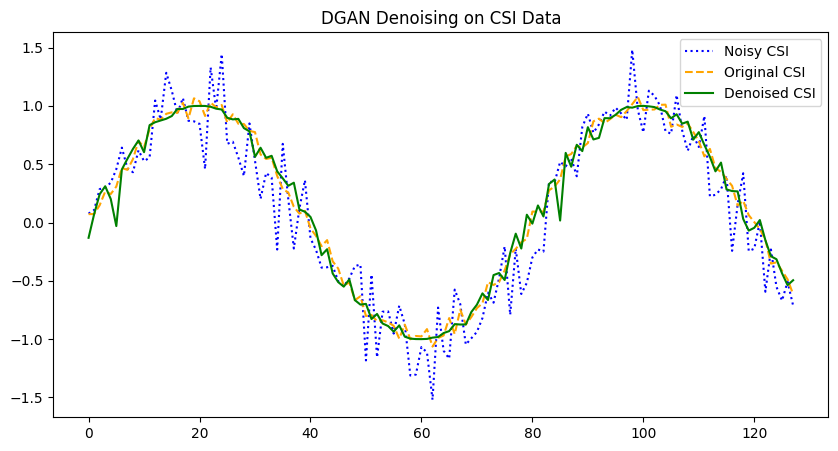

In [85]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --------------------------
# 1. Data Preparation (Simulated CSI Data)
# --------------------------
# Simulating noisy CSI data
def generate_csi_data(num_samples=1000, seq_length=128):
    clean_csi = np.sin(np.linspace(0, 10, seq_length)) + np.random.uniform(-0.1, 0.1, seq_length)
    noisy_csi = clean_csi + np.random.normal(0, 0.2, seq_length)
    return noisy_csi, clean_csi

# Generate CSI dataset
num_samples = 5000
csi_noisy, csi_clean = zip(*[generate_csi_data() for _ in range(num_samples)])
csi_noisy = np.array(csi_noisy)
csi_clean = np.array(csi_clean)

# Convert to tensors
csi_noisy_tensor = torch.tensor(csi_noisy, dtype=torch.float32).to(device)
csi_clean_tensor = torch.tensor(csi_clean, dtype=torch.float32).to(device)

# --------------------------
# 2. Define the Generator
# --------------------------
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 128),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# --------------------------
# 3. Define the Discriminator
# --------------------------
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# --------------------------
# 4. Initialize Models and Optimizers
# --------------------------
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# --------------------------
# 5. Training the DGAN
# --------------------------
epochs = 5000
batch_size = 64

for epoch in range(epochs):
    # Random batch selection
    idx = np.random.randint(0, num_samples, batch_size)
    real_data = csi_clean_tensor[idx]
    noisy_data = csi_noisy_tensor[idx]

    # Generate denoised data
    fake_data = generator(noisy_data)

    # Train Discriminator
    optimizer_D.zero_grad()
    real_loss = criterion(discriminator(real_data), torch.ones(batch_size, 1).to(device))
    fake_loss = criterion(discriminator(fake_data.detach()), torch.zeros(batch_size, 1).to(device))
    loss_D = (real_loss + fake_loss) / 2
    loss_D.backward()
    optimizer_D.step()

    # Train Generator
    optimizer_G.zero_grad()
    loss_G = criterion(discriminator(fake_data), torch.ones(batch_size, 1).to(device))
    loss_G.backward()
    optimizer_G.step()

    # Print losses every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")

# --------------------------
# 6. Evaluating the Model
# --------------------------
with torch.no_grad():
    test_noisy, test_clean = generate_csi_data()
    test_noisy_tensor = torch.tensor(test_noisy, dtype=torch.float32).unsqueeze(0).to(device)
    denoised_output = generator(test_noisy_tensor).cpu().numpy().squeeze()

# --------------------------
# 7. Visualization
# --------------------------
plt.figure(figsize=(10, 5))
plt.plot(test_noisy, "b:", label="Noisy CSI")
plt.plot(test_clean, "orange", linestyle="dashed", label="Original CSI")
plt.plot(denoised_output, "g", label="Denoised CSI")
plt.title("DGAN Denoising on CSI Data")
plt.legend()
plt.show()


In [86]:
import torch

# Save the generator model
torch.save(generator.state_dict(), "DGAN_generator.pth")

# Save the discriminator model
torch.save(discriminator.state_dict(), "DGAN_discriminator.pth")

print("Models saved successfully!")


Models saved successfully!


In [90]:
# Initialize model architectures
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Load saved weights
generator.load_state_dict(torch.load("DGAN_generator.pth"))
discriminator.load_state_dict(torch.load("DGAN_discriminator.pth"))

generator.eval()  # Set to evaluation mode
discriminator.eval()

print("Models loaded successfully!")


Models loaded successfully!


In [91]:
import torch.nn.functional as F
import numpy as np

# Generate new test data
X_test_noisy, X_test_original = zip(*[generate_csi_data() for _ in range(100)])
X_test_noisy = np.array(X_test_noisy)
X_test_original = np.array(X_test_original)

# Convert to tensors
X_test_noisy_tensor = torch.tensor(X_test_noisy, dtype=torch.float32).to(device)
X_test_original_tensor = torch.tensor(X_test_original, dtype=torch.float32).to(device)

# Get denoised output
with torch.no_grad():
    denoised_output = generator(X_test_noisy_tensor)

# Compute evaluation metrics
def compute_metrics(original, denoised):
    mse = F.mse_loss(denoised, original).item()
    psnr = 10 * np.log10(1 / mse) if mse > 0 else float('inf')  # Avoid log(0) error
    return mse, psnr

mse, psnr = compute_metrics(X_test_original_tensor, denoised_output)

print(f"Model Evaluation:\nMSE: {mse:.6f}, PSNR: {psnr:.2f} dB")


Model Evaluation:
MSE: 0.008408, PSNR: 20.75 dB


Model Evaluation -> MSE: 0.008800, PSNR: 21.31 dB


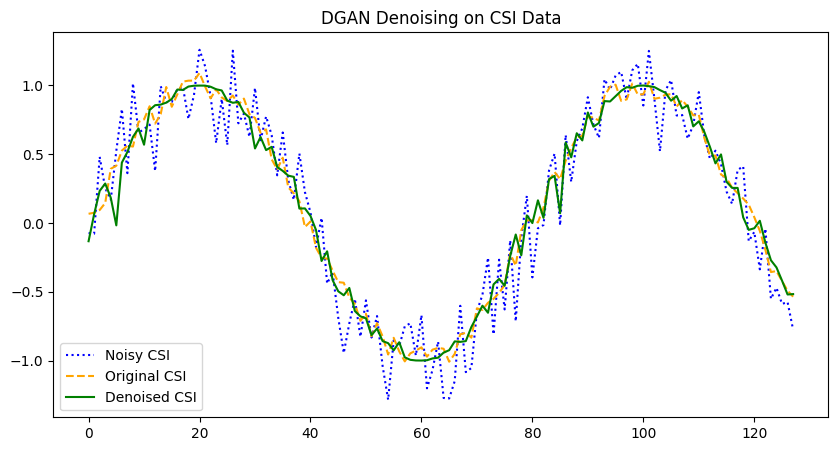

In [93]:
# Load the trained model
generator = Generator().to(device)
generator.load_state_dict(torch.load("/content/DGAN_generator.pth"))
generator.eval()  # Set to evaluation mode

import torch.nn.functional as F

# Generate test noisy CSI data
test_noisy, test_clean = generate_csi_data()
test_noisy_tensor = torch.tensor(test_noisy, dtype=torch.float32).unsqueeze(0).to(device)

# Generate denoised output
with torch.no_grad():
    denoised_output = generator(test_noisy_tensor).cpu().numpy().squeeze()

# Compute MSE
mse = np.mean((denoised_output - test_clean) ** 2)

# Compute PSNR
max_pixel = np.max(test_clean)  # Max possible value in clean CSI
psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

print(f"Model Evaluation -> MSE: {mse:.6f}, PSNR: {psnr:.2f} dB")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(test_noisy, "b:", label="Noisy CSI")
plt.plot(test_clean, "orange", linestyle="dashed", label="Original CSI")
plt.plot(denoised_output, "g", label="Denoised CSI")
plt.title("DGAN Denoising on CSI Data")
plt.legend()
plt.show()



Model Evaluation Metrics:
MSE  : 0.009084
MAE  : 0.068527
RMSE : 0.095310
PSNR : 21.24 dB
SSIM : 0.7518
SNR  : 17.20 dB


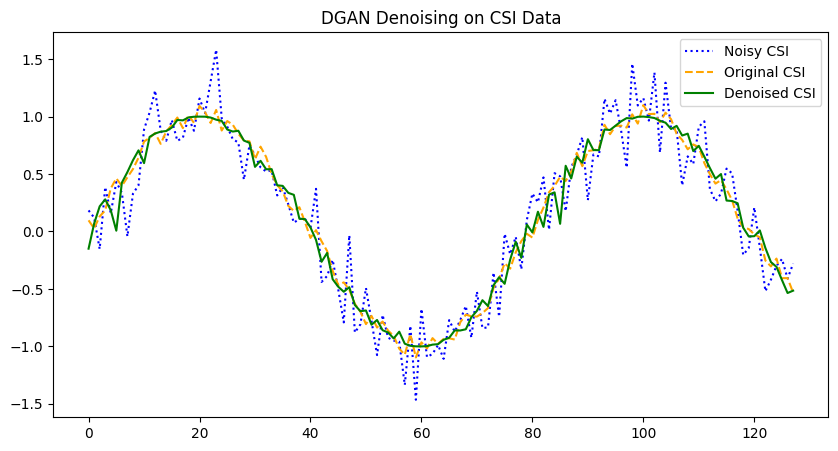

In [94]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Load the trained model
generator = Generator().to(device)
generator.load_state_dict(torch.load("DGAN_generator.pth"))
generator.eval()  # Set to evaluation mode

# Generate test noisy CSI data
test_noisy, test_clean = generate_csi_data()
test_noisy_tensor = torch.tensor(test_noisy, dtype=torch.float32).unsqueeze(0).to(device)

# Generate denoised output
with torch.no_grad():
    denoised_output = generator(test_noisy_tensor).cpu().numpy().squeeze()

# Compute Metrics
mse = np.mean((denoised_output - test_clean) ** 2)  # Mean Squared Error
mae = np.mean(np.abs(denoised_output - test_clean))  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Compute PSNR
max_pixel = np.max(test_clean)  # Max possible value in clean CSI
psnr = 20 * np.log10(max_pixel / np.sqrt(mse)) if mse > 0 else float('inf')

# Compute SSIM
ssim_value = ssim(test_clean, denoised_output, data_range=test_clean.max() - test_clean.min())

# Compute Signal-to-Noise Ratio (SNR)
signal_power = np.mean(np.square(test_clean))
noise_power = np.mean(np.square(test_clean - denoised_output))
snr = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else float('inf')

# Print Results
print(f"Model Evaluation Metrics:")
print(f"MSE  : {mse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"PSNR : {psnr:.2f} dB")
print(f"SSIM : {ssim_value:.4f}")
print(f"SNR  : {snr:.2f} dB")

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(test_noisy, "b:", label="Noisy CSI")
plt.plot(test_clean, "orange", linestyle="dashed", label="Original CSI")
plt.plot(denoised_output, "g", label="Denoised CSI")
plt.title("DGAN Denoising on CSI Data")
plt.legend()
plt.show()
